In [2]:
import pandas as pd
data = pd.read_csv('github_bot_processed_data.csv')

pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', None)

print(data)

       label   type  site_admin  company   blog  location  hireable  \
0      Human   True       False    False  False     False     False   
1      Human   True       False    False   True     False      True   
2      Human   True       False     True   True      True      True   
3        Bot   True       False    False  False      True     False   
4      Human   True       False    False  False     False      True   
5      Human   True       False     True   True      True     False   
6      Human   True       False     True   True      True      True   
7      Human   True       False     True  False      True     False   
8      Human   True       False    False  False     False     False   
9      Human   True       False     True   True      True     False   
10     Human   True       False     True  False      True     False   
11     Human   True       False     True  False     False     False   
12     Human   True       False     True   True      True      True   
13    

In [3]:
data.info()
print('----------------------------------------')
print(data.head(4))
print('----------------------------------------')
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19768 entries, 0 to 19767
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   label           19768 non-null  object
 1   type            19768 non-null  bool  
 2   site_admin      19768 non-null  bool  
 3   company         19768 non-null  bool  
 4   blog            19768 non-null  bool  
 5   location        19768 non-null  bool  
 6   hireable        19768 non-null  bool  
 7   bio             8839 non-null   object
 8   public_repos    19768 non-null  int64 
 9   public_gists    19768 non-null  int64 
 10  followers       19768 non-null  int64 
 11  following       19768 non-null  int64 
 12  created_at      19768 non-null  object
 13  updated_at      19768 non-null  object
 14  text_bot_count  19768 non-null  int64 
dtypes: bool(6), int64(5), object(4)
memory usage: 1.5+ MB
----------------------------------------
   label  type  site_admin  company   blog 

,public_repos,public_gists,followers,following,text_bot_count
count,19768.000000,19768.000000,19768.000000,19768.000000,19768.000000
mean,84.139215,25.214083,245.497015,44.520741,0.061362
std,574.750217,635.690142,1535.939961,366.793439,0.341003
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.000000,0.000000,7.000000,0.000000,0.000000
50%,35.000000,2.000000,33.000000,4.000000,0.000000
75%,83.000000,10.000000,125.000000,22.000000,0.000000
max,50000.000000,55781.000000,95752.000000,27775.000000,5.000000


In [4]:
data['created_at'] = pd.to_datetime(data['created_at'])
data['created_at'] = data['created_at'].apply(lambda x:x.strftime('%Y-%m-%d'))

data['updated_at'] = pd.to_datetime(data['updated_at'])
data['updated_at'] = data['updated_at'].apply(lambda x:x.strftime('%Y-%m-%d'))

print(data)

       label   type  site_admin  company   blog  location  hireable  \
0      Human   True       False    False  False     False     False   
1      Human   True       False    False   True     False      True   
2      Human   True       False     True   True      True      True   
3        Bot   True       False    False  False      True     False   
4      Human   True       False    False  False     False      True   
5      Human   True       False     True   True      True     False   
6      Human   True       False     True   True      True      True   
7      Human   True       False     True  False      True     False   
8      Human   True       False    False  False     False     False   
9      Human   True       False     True   True      True     False   
10     Human   True       False     True  False      True     False   
11     Human   True       False     True  False     False     False   
12     Human   True       False     True   True      True      True   
13    

In [5]:
import numpy as np

data['public_repos']=np.log10(1+data['public_repos'])
data['public_gists']=np.log10(1+data['public_gists'])
data['followers']=np.log10(1+data['followers'])
data['following']=np.log10(1+data['following'])

print(data)

       label   type  site_admin  company   blog  location  hireable  \
0      Human   True       False    False  False     False     False   
1      Human   True       False    False   True     False      True   
2      Human   True       False     True   True      True      True   
3        Bot   True       False    False  False      True     False   
4      Human   True       False    False  False     False      True   
5      Human   True       False     True   True      True     False   
6      Human   True       False     True   True      True      True   
7      Human   True       False     True  False      True     False   
8      Human   True       False    False  False     False     False   
9      Human   True       False     True   True      True     False   
10     Human   True       False     True  False      True     False   
11     Human   True       False     True  False     False     False   
12     Human   True       False     True   True      True      True   
13    

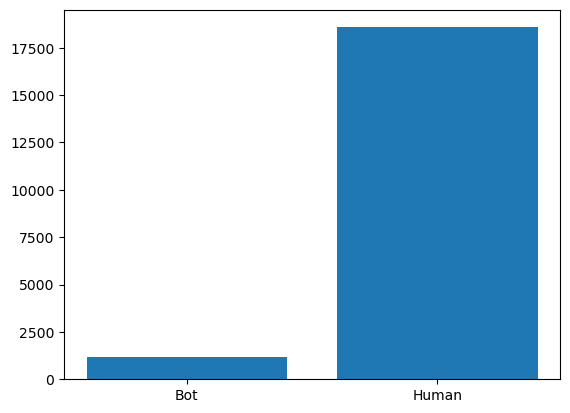

In [5]:
import matplotlib.pyplot as plt
label=['Bot','Human']
dat=[]
res1=0
res2=0
for i in data['label']:
    if i=='Human':
        res2+=1
    elif i=='Bot':
        res1+=1
dat.append(res1)
dat.append(res2)
plt.bar(label,dat)
plt.show()

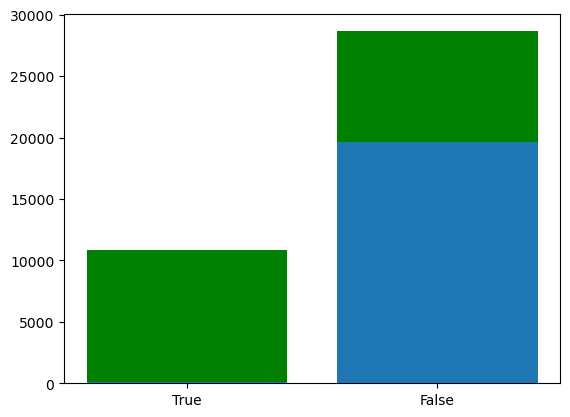

In [6]:
label=['True','False']
dat=[]
dat2=[]
res1=0
res12=0
res2=0
res22=0
for i in data['site_admin']:
    if i==True:
        res1+=1
    elif i==False:
        res2+=1
for i in data['company']:
    if i==True:
        res12+=1
    elif i==False:
        res22+=1
dat.append(res1)
dat.append(res2)
dat2.append(res12)
dat2.append(res22)
plt.bar(label,dat)
plt.bar(label,dat2,color='g',bottom=dat)
plt.show()

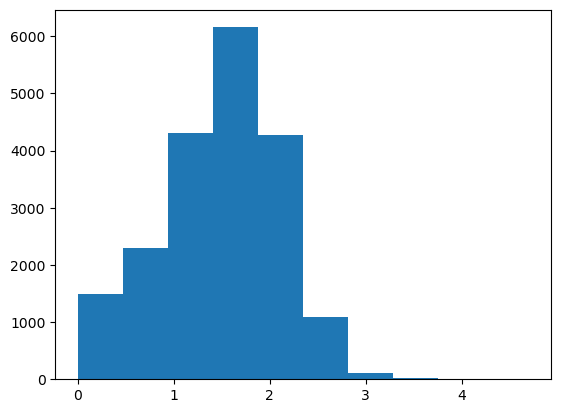

In [7]:
import matplotlib.pyplot as plt

fig = plt.figure()

ax = fig.add_subplot(111)

ax.hist(data['public_repos'])
plt.show()

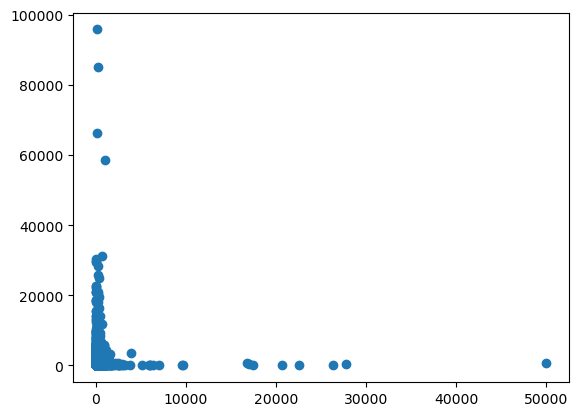

In [8]:
data = pd.read_csv('github_bot_processed_data.csv')

plt.scatter(data['public_repos'],data['followers'])
plt.show()

array([[<Axes: xlabel='public_repos', ylabel='public_repos'>,
        <Axes: xlabel='public_gists', ylabel='public_repos'>,
        <Axes: xlabel='followers', ylabel='public_repos'>,
        <Axes: xlabel='following', ylabel='public_repos'>],
       [<Axes: xlabel='public_repos', ylabel='public_gists'>,
        <Axes: xlabel='public_gists', ylabel='public_gists'>,
        <Axes: xlabel='followers', ylabel='public_gists'>,
        <Axes: xlabel='following', ylabel='public_gists'>],
       [<Axes: xlabel='public_repos', ylabel='followers'>,
        <Axes: xlabel='public_gists', ylabel='followers'>,
        <Axes: xlabel='followers', ylabel='followers'>,
        <Axes: xlabel='following', ylabel='followers'>],
       [<Axes: xlabel='public_repos', ylabel='following'>,
        <Axes: xlabel='public_gists', ylabel='following'>,
        <Axes: xlabel='followers', ylabel='following'>,
        <Axes: xlabel='following', ylabel='following'>]], dtype=object)

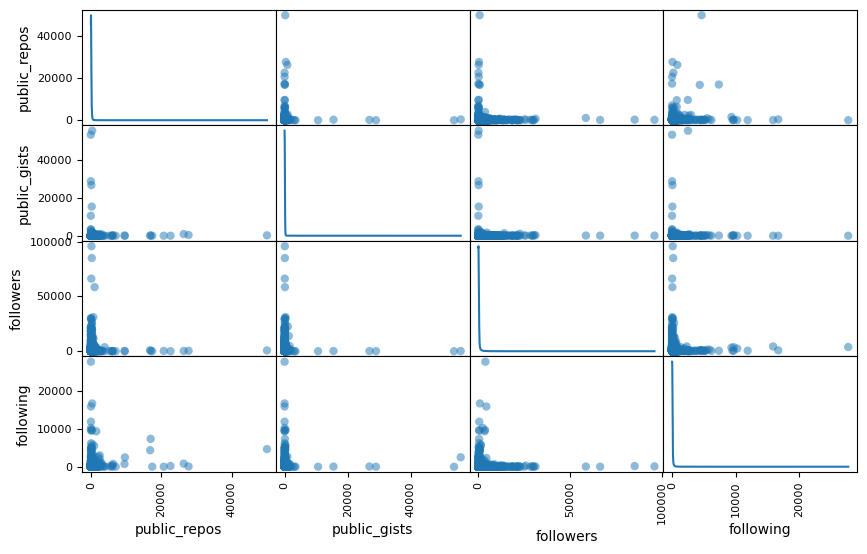

In [10]:
from pandas.plotting import scatter_matrix
import pandas as pd

dat=[]
lenn=len(data['public_repos'])
for i in range (0,lenn):
    datt=[]
    datt.append(data['public_repos'][i])
    datt.append(data['public_gists'][i])
    datt.append(data['followers'][i])
    datt.append(data['following'][i])
    dat.append(datt)
    
df = pd.DataFrame(dat,columns = ['public_repos','public_gists','followers','following'])
pd.plotting.scatter_matrix(df,figsize=(10,6),
                 marker = 'o',
                 diagonal='kde',
                 alpha = 0.5,
                 range_padding=0.1)


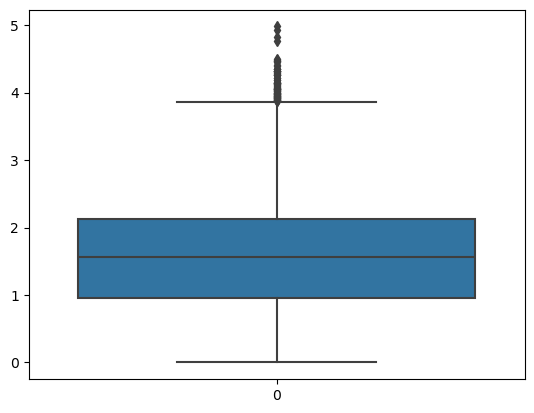

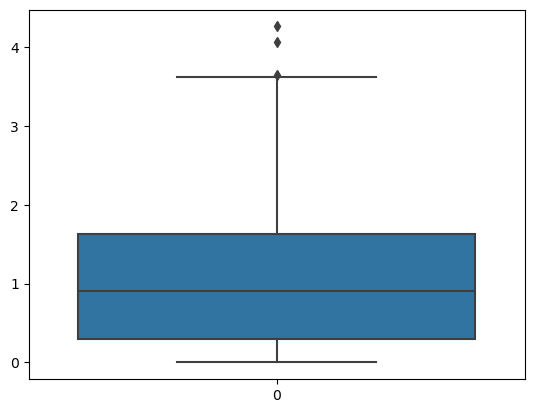

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
dat=[]
dat2=[]
lenn=len(data['public_repos'])
for i in range (0,lenn):
    x=data['label'][i]
    if x=='Human':
        dat.append(data['followers'][i])
    elif x=='Bot':
        dat2.append(data['followers'][i])
sns.boxplot(dat)
plt.show()
sns.boxplot(dat2)
plt.show()

E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

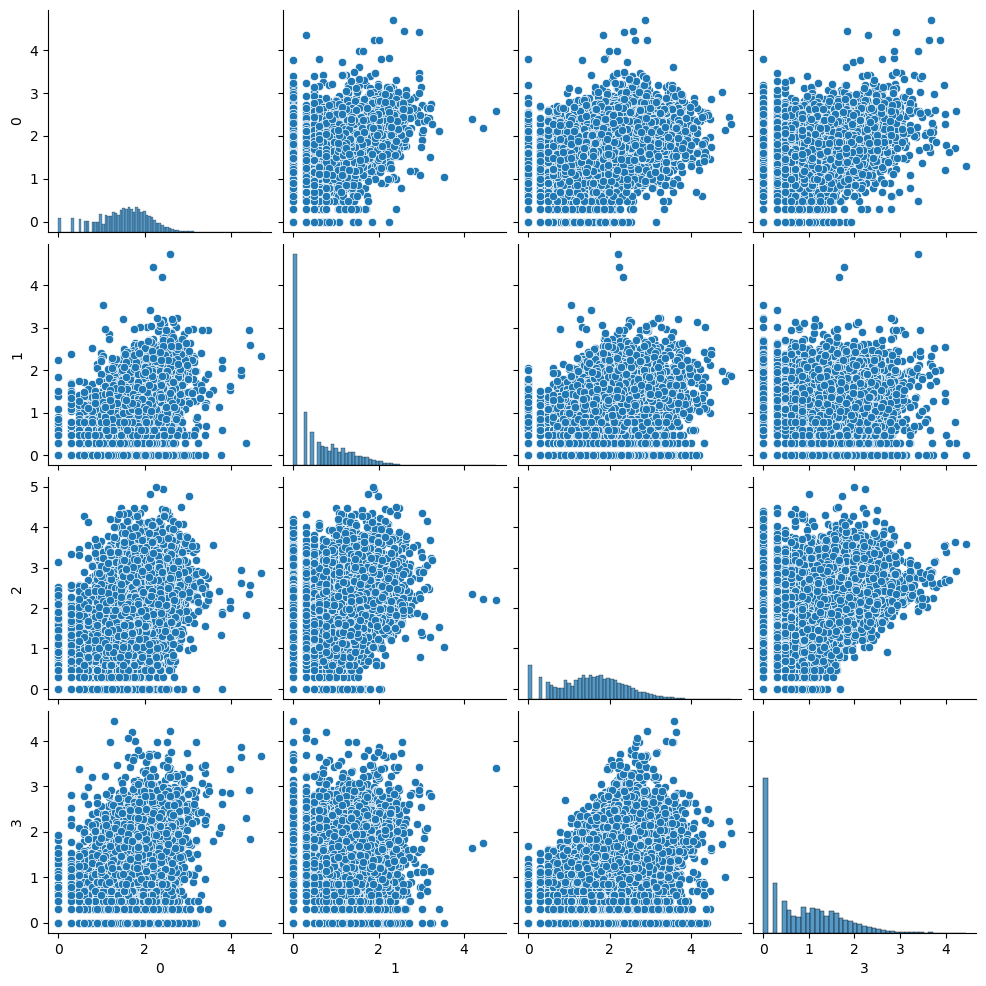

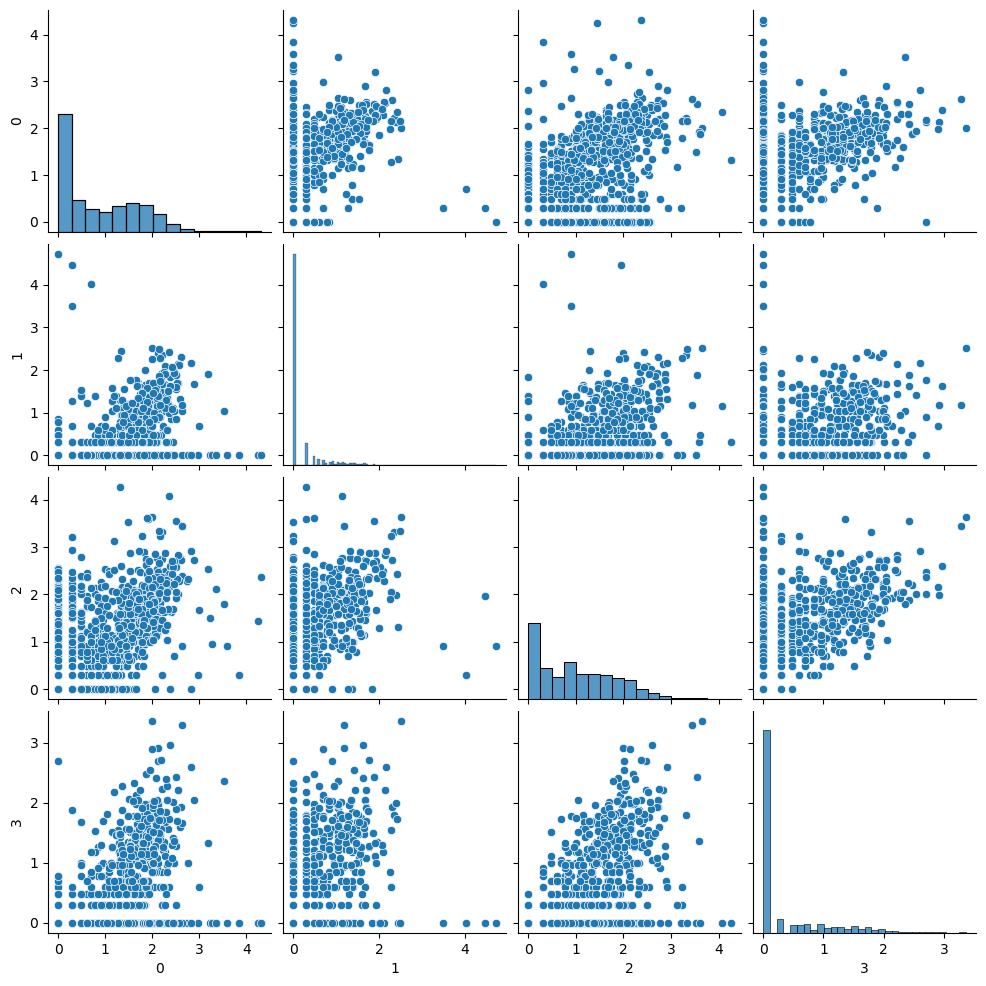

In [18]:
dat=[]
dat2=[]
lenn=len(data['public_repos'])
for i in range (0,lenn):
    x=data['label'][i]
    if x=='Human':
        datt=[]
        datt.append(data['public_repos'][i])
        datt.append(data['public_gists'][i])
        datt.append(data['followers'][i])
        datt.append(data['following'][i])
        dat.append(datt)
    elif x=='Bot':
        datt=[]
        datt.append(data['public_repos'][i])
        datt.append(data['public_gists'][i])
        datt.append(data['followers'][i])
        datt.append(data['following'][i])
        dat2.append(datt)

df = pd.DataFrame(dat)
sns.pairplot(df)
df = pd.DataFrame(dat2)
sns.pairplot(df)

<Axes: >

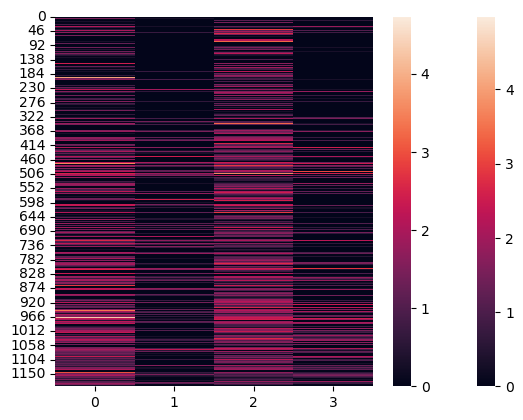

In [19]:
dat=[]
dat2=[]
lenn=len(data['public_repos'])
for i in range (0,lenn):
    x=data['label'][i]
    if x=='Human':
        datt=[]
        datt.append(data['public_repos'][i])
        datt.append(data['public_gists'][i])
        datt.append(data['followers'][i])
        datt.append(data['following'][i])
        dat.append(datt)
    elif x=='Bot':
        datt=[]
        datt.append(data['public_repos'][i])
        datt.append(data['public_gists'][i])
        datt.append(data['followers'][i])
        datt.append(data['following'][i])
        dat2.append(datt)

df = pd.DataFrame(dat)
sns.heatmap(df)
df = pd.DataFrame(dat2)
sns.heatmap(df)

<Axes: >

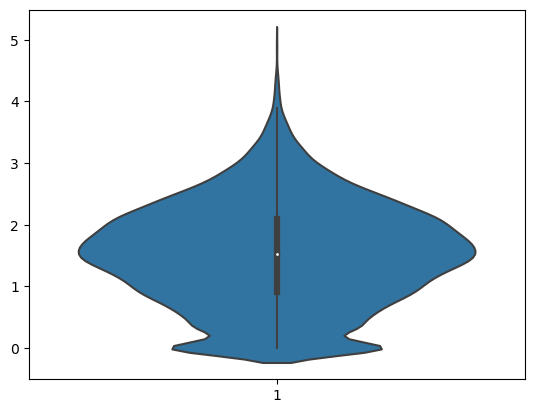

In [20]:
dat=[]
lenn=len(data['public_repos'])
for i in range (0,lenn):
    datt=[]
    datt.append(data['label'][i])
    datt.append(data['followers'][i])
    dat.append(datt)
df = pd.DataFrame(dat)
sns.violinplot(data=df)

                                             |               | [  0%]   00:00 -> (? left)


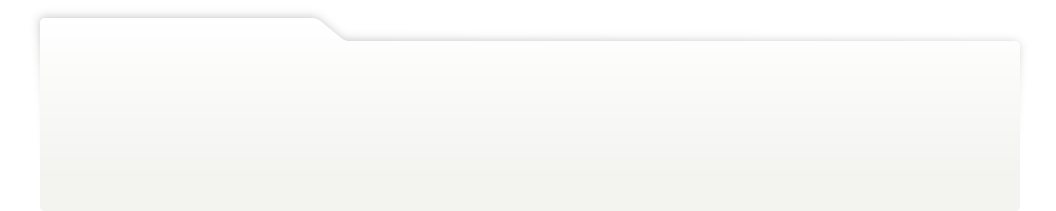
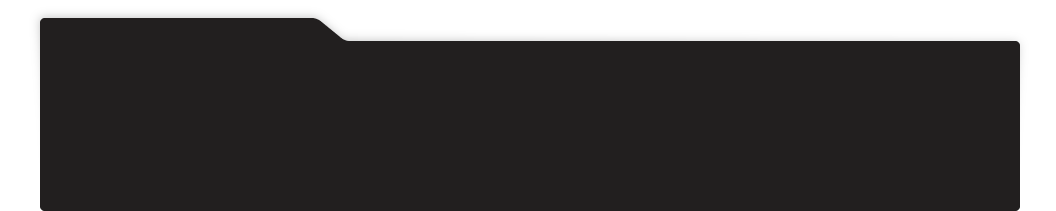
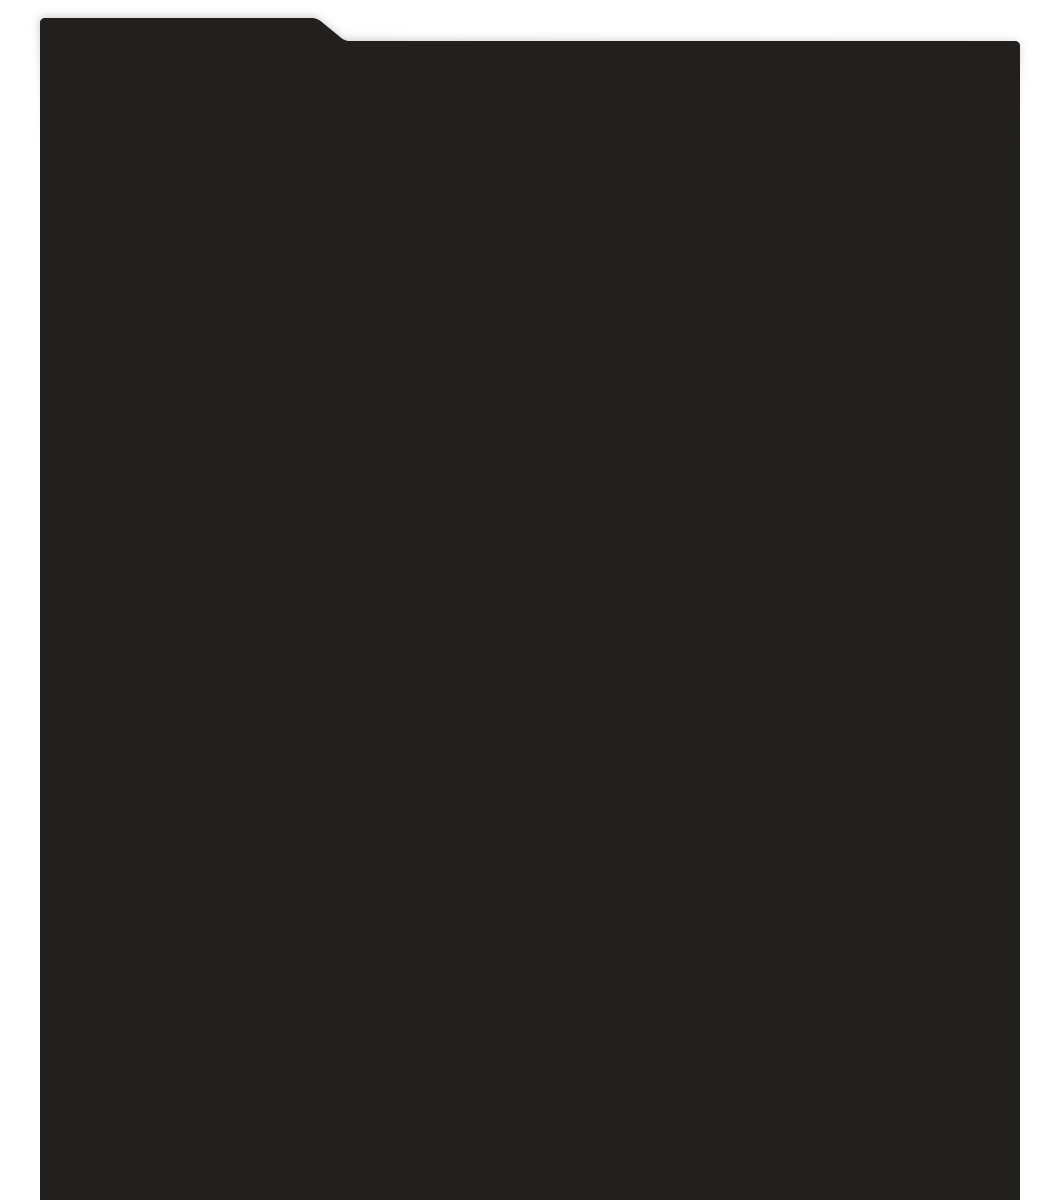
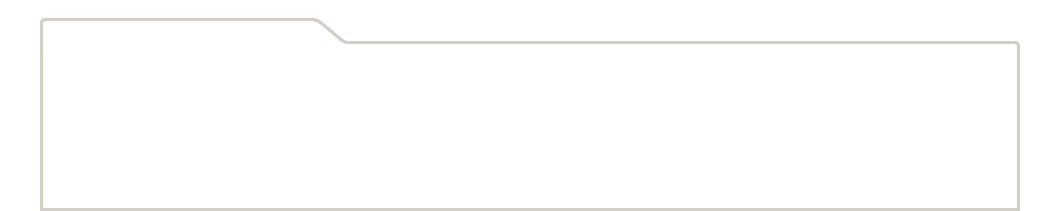
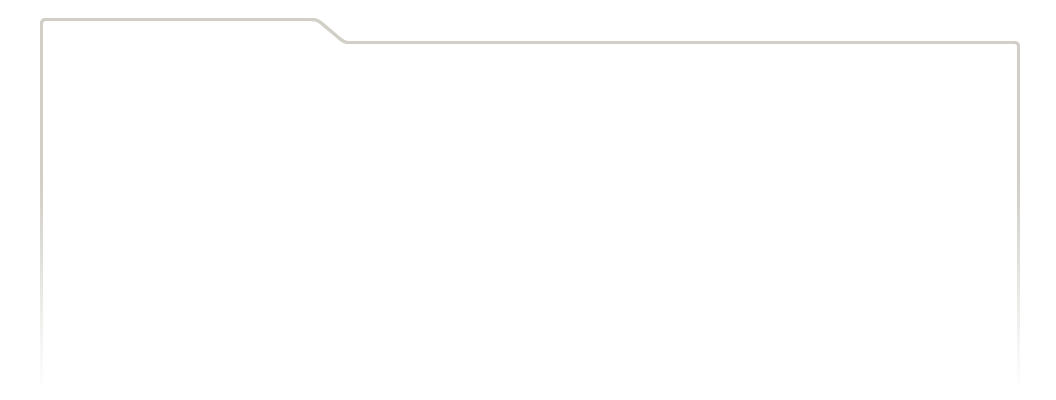
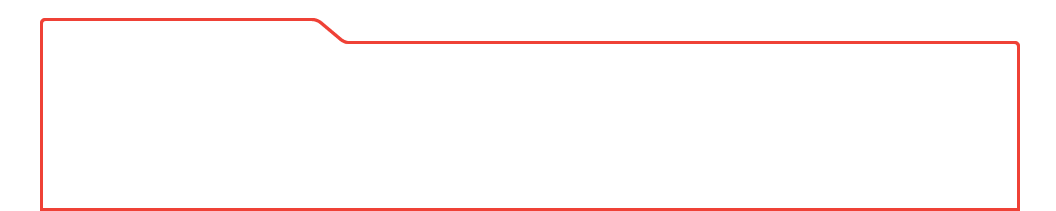
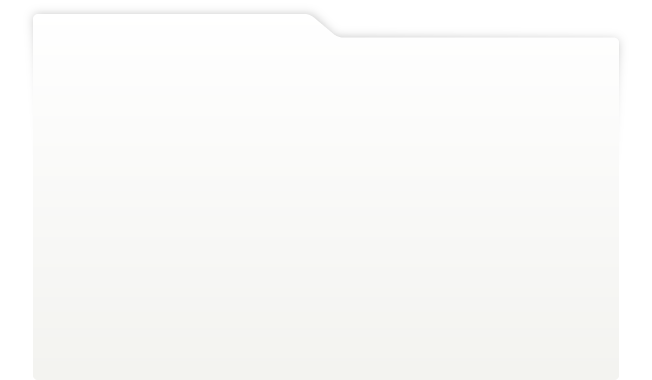
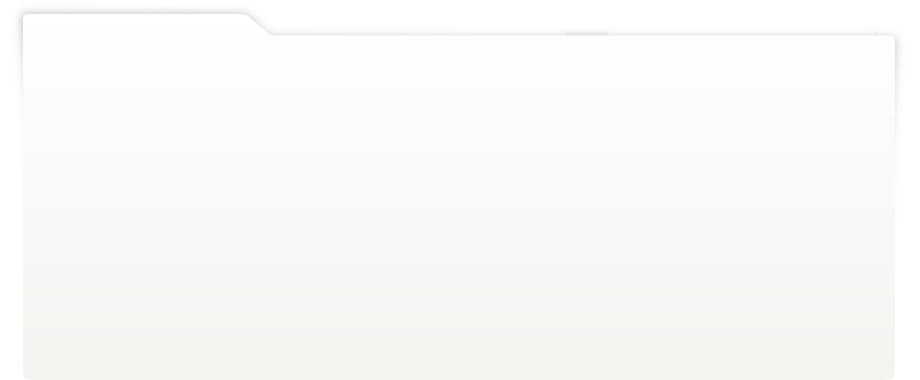
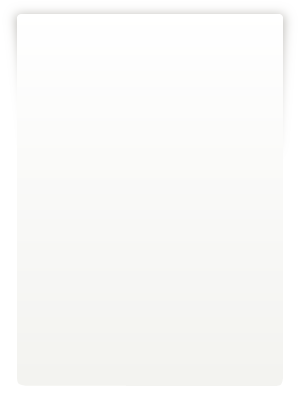
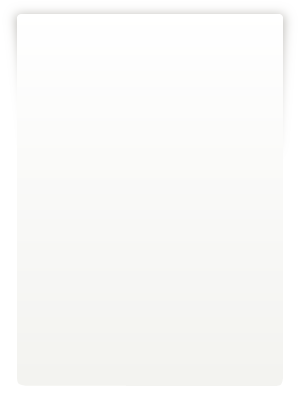
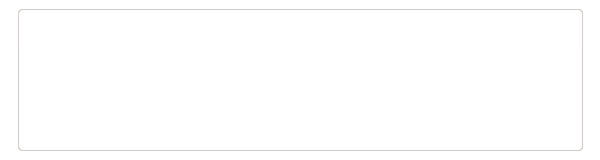
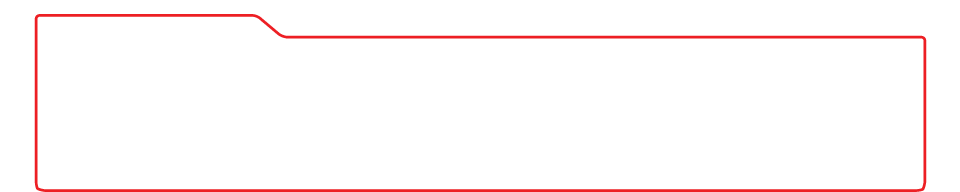
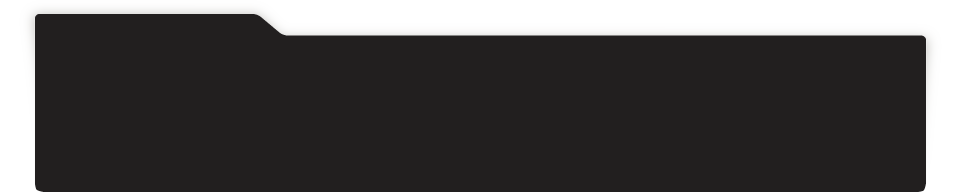
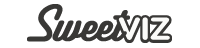
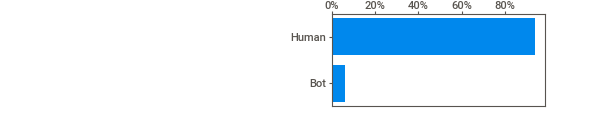
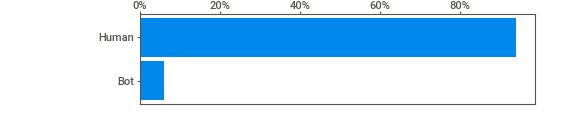
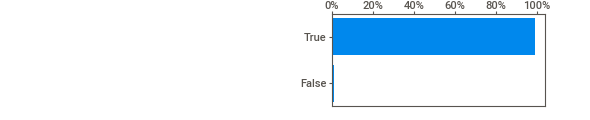
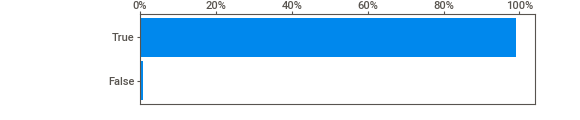
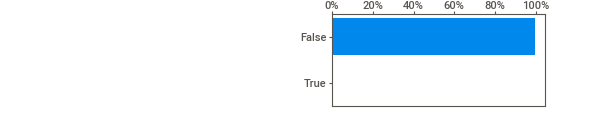
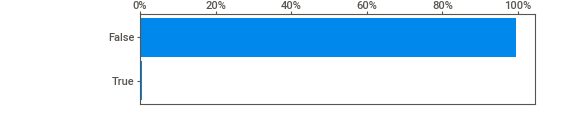
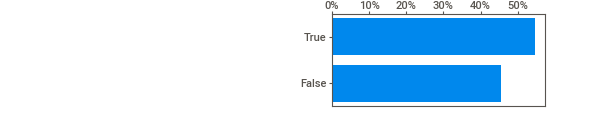
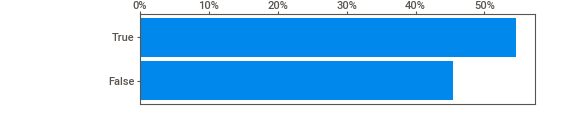
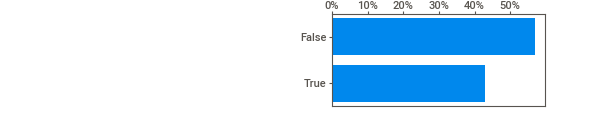
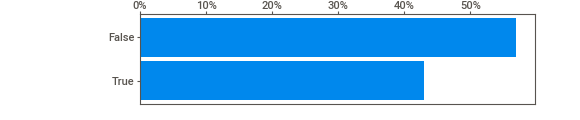
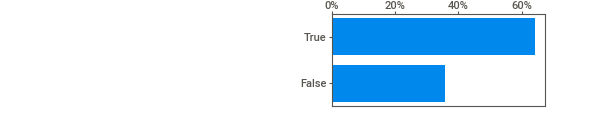
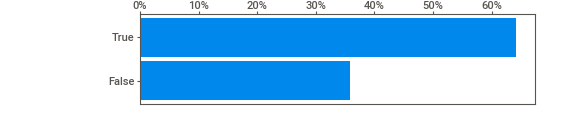
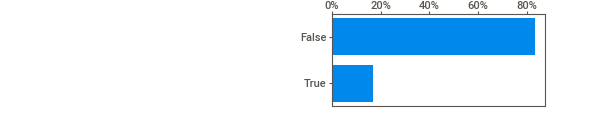
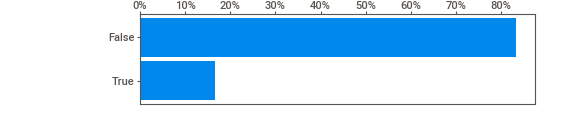
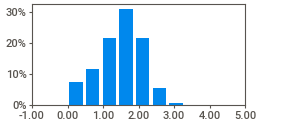
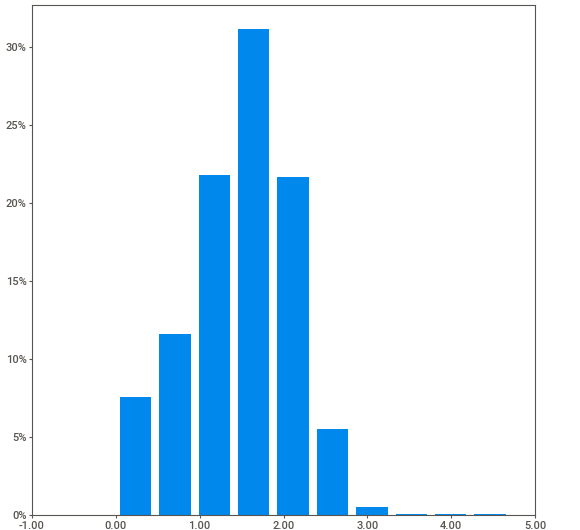
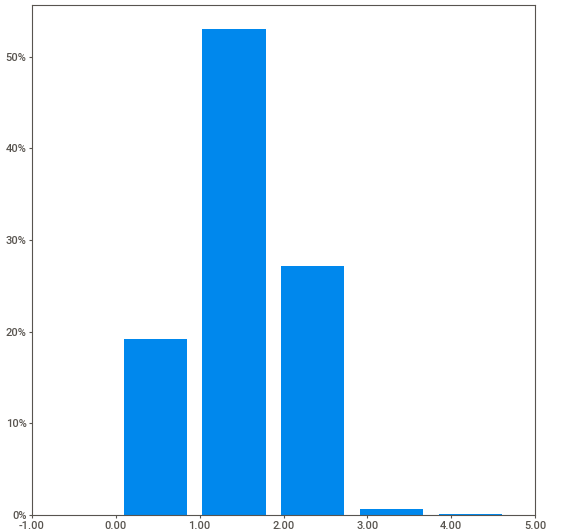
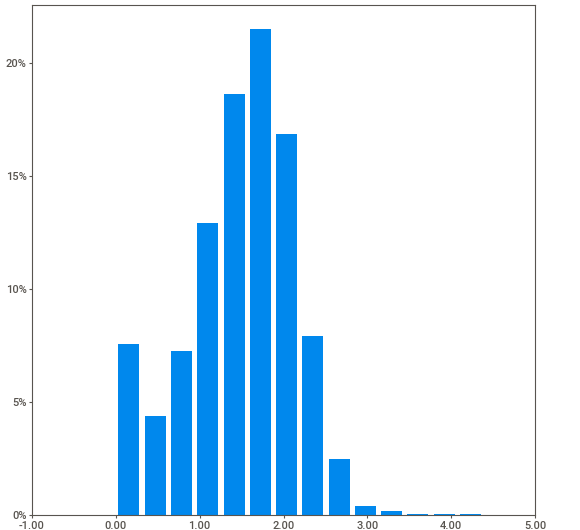
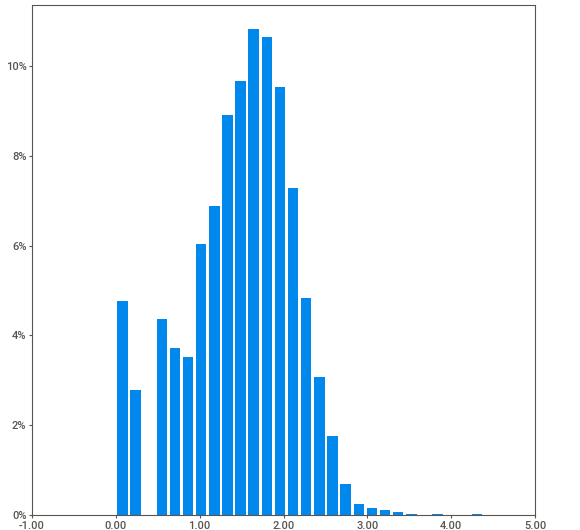
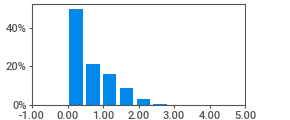
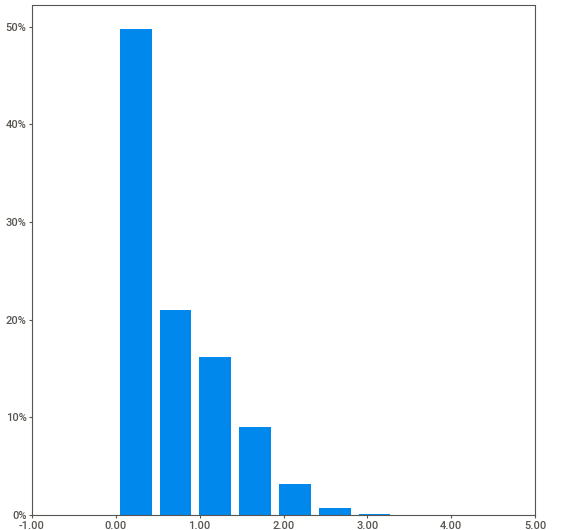
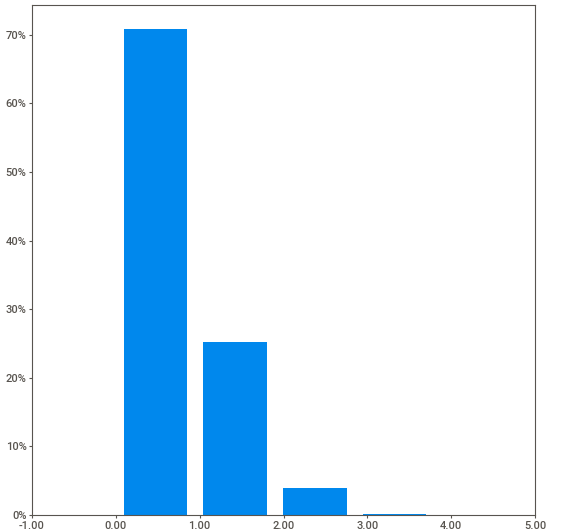
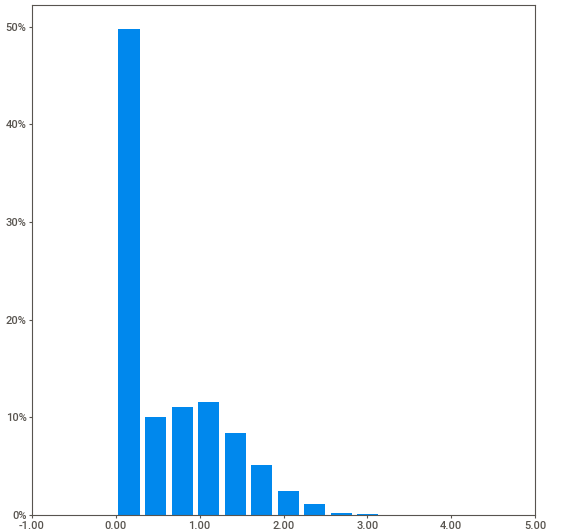
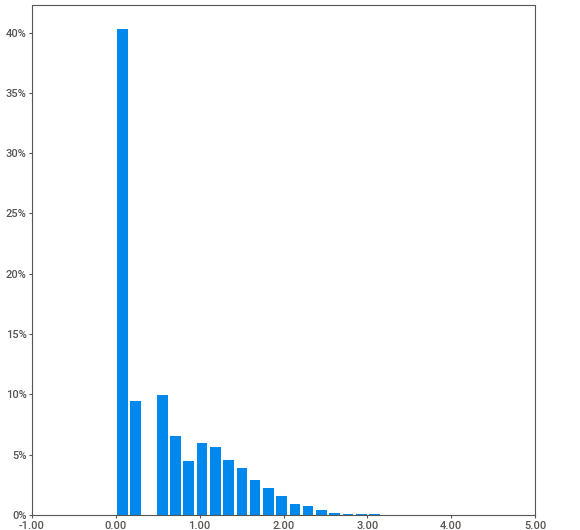
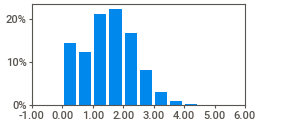
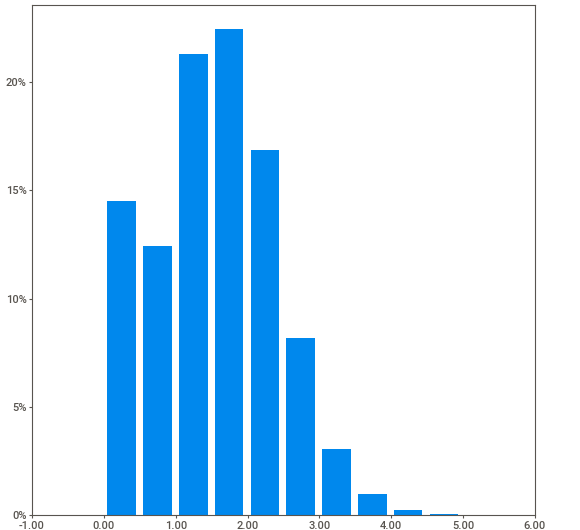
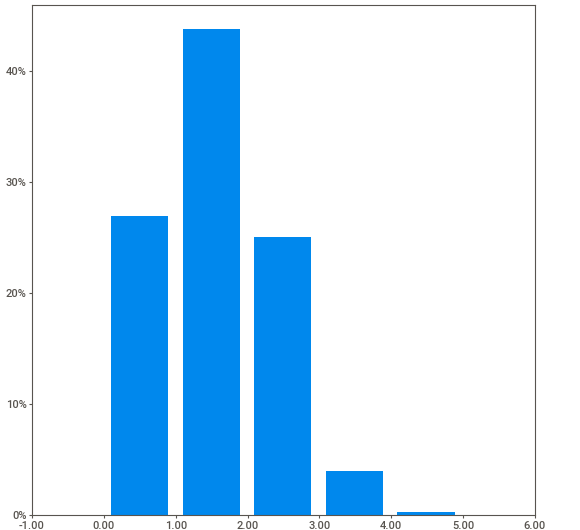
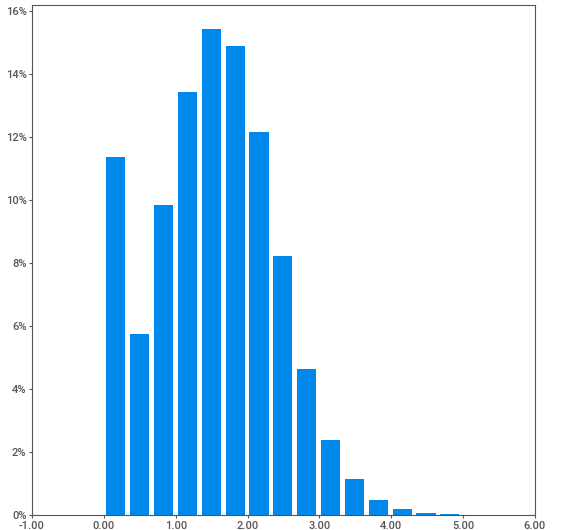
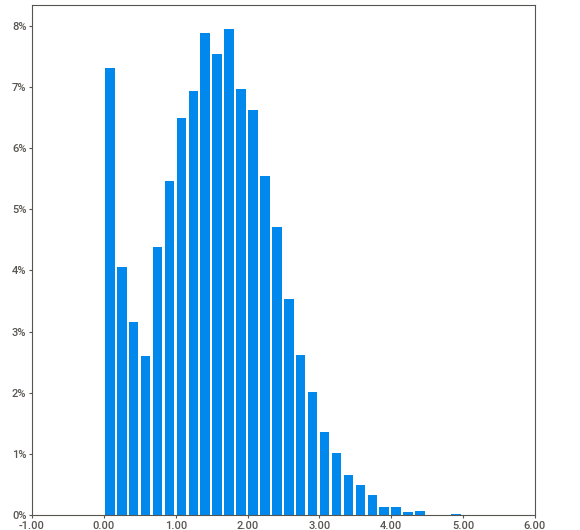
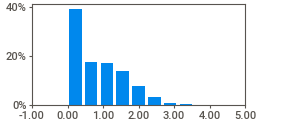
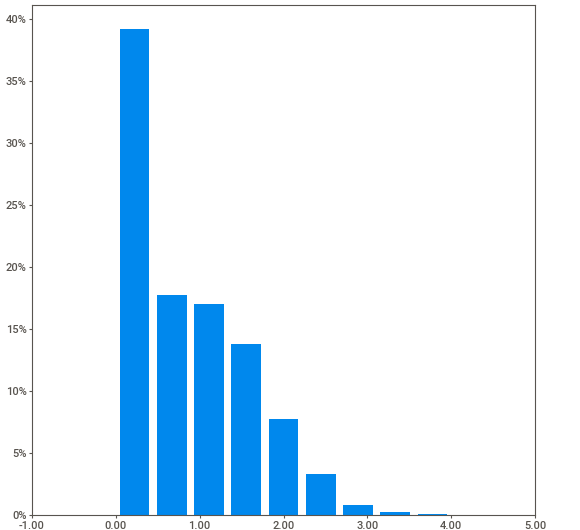
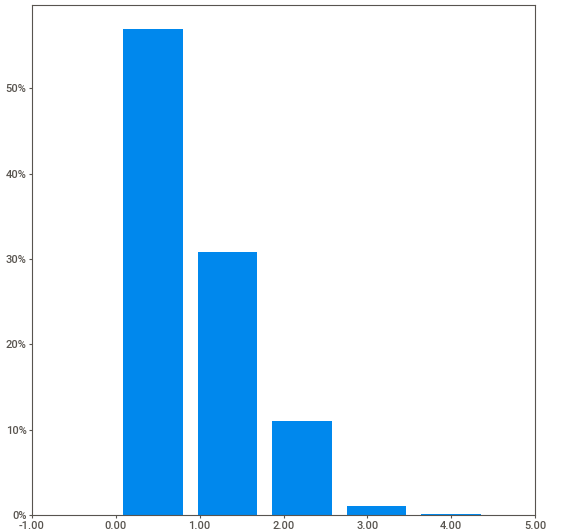
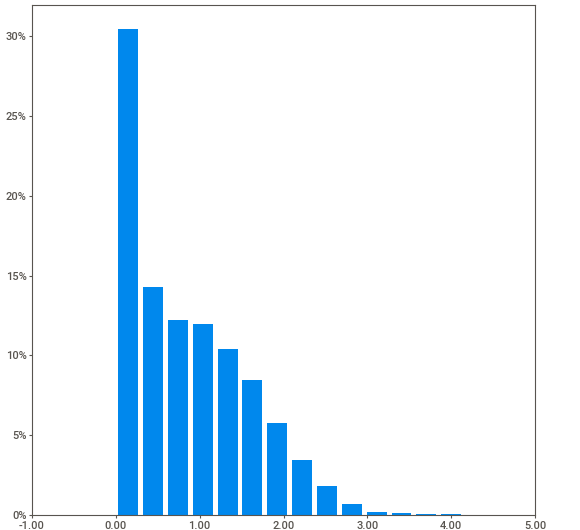
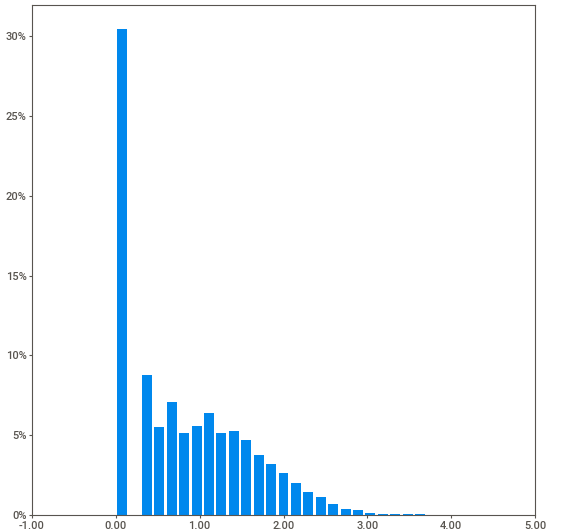
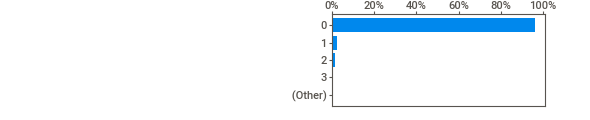
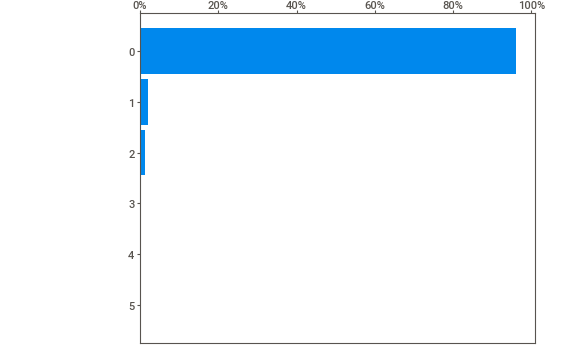
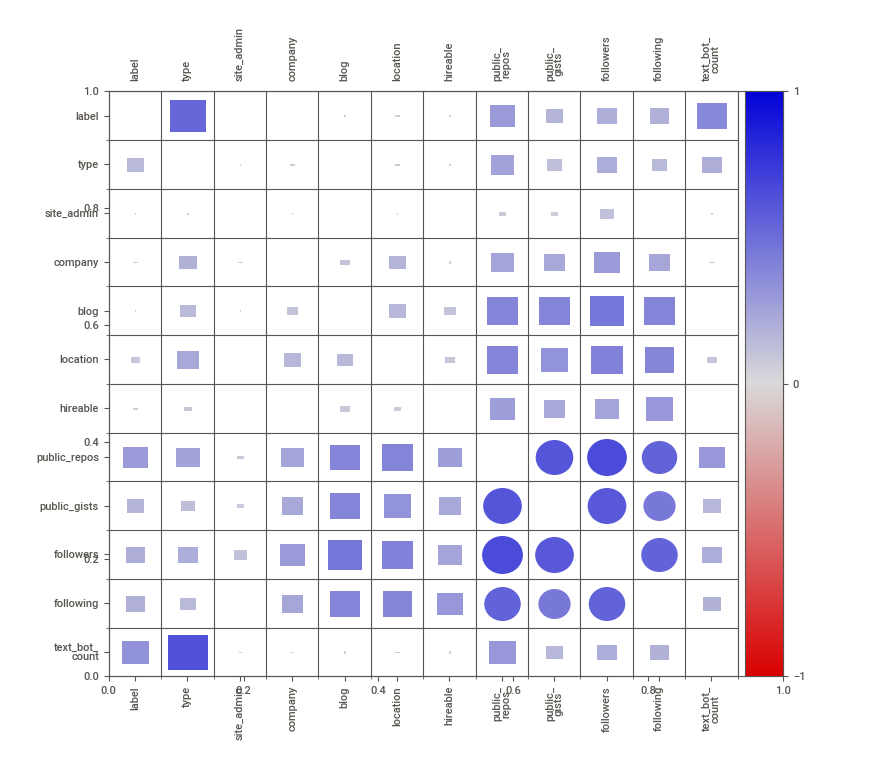
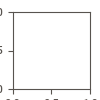

In [6]:
import sweetviz as sv
df = pd.DataFrame(data)
report = sv.analyze([df,'Report'])
report.show_notebook()